# Example 1b - using xcube to access different data sets in Sentine Hub

This notebook shows how to access different data sets through the Sentinel Hub API:

1. Access **Sentiel-2 L2A** through xcube Sentinel hub Store
2. Access **Sentiel-2 L1C** through xcube Sentinel hub Store
3. Access **Sentiel-1 GRD** through xcube Sentinel hub Store
4. Access **DEM** through xcube Sentinel hub Store
5. Access to a **custom data set** ingested into Sentinel Hub via [**BYOD**](https://www.sentinel-hub.com/bring-your-own-data) mechanism

To run this Notebook, make sure the SENTINEL Hub / xcube Integration is setup correctly, see [Ex0-DCFS-Setup](./Ex0-DCFS-Setup.ipynb).

In [68]:
from xcube_sh.config import CubeConfig
from xcube_sh.cube import open_cube
from xcube_sh.sentinelhub import SentinelHub
import xarray as xr
import numpy as np

In [2]:
x1 = 10.00  # degree
y1 = 54.27  # degree
x2 = 11.00  # degree
y2 = 54.60  # degree

bbox = x1, y1, x2, y2

In [3]:
spatial_res = 0.00018   # = 20.038 meters in degree

In [56]:
SH = SentinelHub()
SH.dataset_names

['S2L1C', 'S1GRD', 'CUSTOM', 'DEM', 'S2L2A']

## Sentinel-2 L2A

In [5]:
SH.band_names('S2L2A')

['B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B8A',
 'B09',
 'B11',
 'B12',
 'SCL',
 'SNW',
 'CLD',
 'viewZenithMean',
 'viewAzimuthMean',
 'sunZenithAngles',
 'sunAzimuthAngles',
 'AOT']

In [8]:
cube_config = CubeConfig(dataset_name='S2L2A',
                         band_names=['SCL'],
                         tile_size=[512, 512],
                         geometry=bbox,
                         spatial_res=spatial_res,
                         time_range=['2018-05-14', '2018-07-31'],
                         time_tolerance='30M')  

In [9]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 2048, lon: 5632, time: 46)
Coordinates:
  * lat        (lat) float64 54.64 54.64 54.64 54.64 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 11.01 11.01 11.01 11.01
  * time       (time) datetime64[ns] 2018-05-15T10:30:24 ... 2018-07-31T10:20:24
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(46, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    SCL        (time, lat, lon) uint8 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.store.SentinelHubStore', ...
    date_created:            2019-11-12T14:53:11.978029
    processing_level:        L2A
    time_coverage_start:     2018-05-15T10:30:24+00:00
    time_coverage_end:       2018-07-31T10:20:24+00:00
    time_coverage_duration:  P76DT23H50M0S
    geospatial_lo

In [10]:
cube.SCL.isel(time=5, lat=slice(0,2000),lon=slice(0,2000)).plot.imshow(cmap='tab20c')

## Sentinel-2 L1C

In [11]:
SH.band_names('S2L1C')

['B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B8A',
 'B09',
 'B10',
 'B11',
 'B12',
 'viewZenithMean',
 'viewAzimuthMean',
 'sunZenithAngles',
 'sunAzimuthAngles']

In [13]:
cube_config = CubeConfig(dataset_name='S2L1C',
                         band_names=['B04'],
                         tile_size=[512, 512],
                         geometry=bbox,
                         spatial_res=spatial_res,
                         time_range=['2018-05-14', '2018-07-31'],
                         time_tolerance='30M')  

In [14]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 2048, lon: 5632, time: 46)
Coordinates:
  * lat        (lat) float64 54.64 54.64 54.64 54.64 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 11.01 11.01 11.01 11.01
  * time       (time) datetime64[ns] 2018-05-15T10:30:24 ... 2018-07-31T10:20:24
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(46, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L1C Data Cube Subset
    history:                 [{'program': 'xcube_sh.store.SentinelHubStore', ...
    date_created:            2019-11-12T14:53:44.700848
    processing_level:        L1C
    time_coverage_start:     2018-05-15T10:30:24+00:00
    time_coverage_end:       2018-07-31T10:20:24+00:00
    time_coverage_duration:  P76DT23H50M0S
    geospatial_

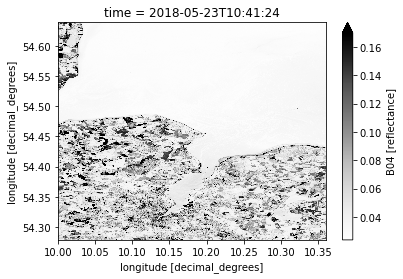

In [15]:
cube.B04.isel(time=5, lat=slice(0,2000),lon=slice(0,2000)).plot.imshow(cmap='Greys', vmax = .17)

## Sentinel-1 GRD

In [16]:
SH.band_names('S1GRD')

['VV', 'VH', 'HH', 'HV']

In [17]:
x1 = 10.00  # degree
y1 = 54.27  # degree
x2 = 10.50  # degree
y2 = 54.60  # degree

bbox = x1, y1, x2, y2

In [18]:
spatial_res = 0.00018 

In [21]:
cube_config = CubeConfig(dataset_name='S1GRD',
                         band_names=['VH'],
                         tile_size=[512, 512],
                         crs = "http://www.opengis.net/def/crs/EPSG/0/4326",
                         spatial_res = spatial_res,
                         geometry=bbox,
                         time_range=['2019-05-14', '2019-07-31'],
                         time_period='2D')  

In [22]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 2048, lon: 3072, time: 40)
Coordinates:
  * lat        (lat) float64 54.64 54.64 54.64 54.64 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 10.55 10.55 10.55 10.55
  * time       (time) datetime64[ns] 2019-05-15 2019-05-17 ... 2019-08-01
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(40, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    VH         (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S1GRD Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2019-11-12T14:54:29.226985
    processing_level:          L1B
    time_coverage_start:       2019-05-14T00:00:00+00:00
    time_coverage_end:         2019-08-02T00:00:00+00:00
    time_coverage_duration:    P80DT0H0M0S
    time_c

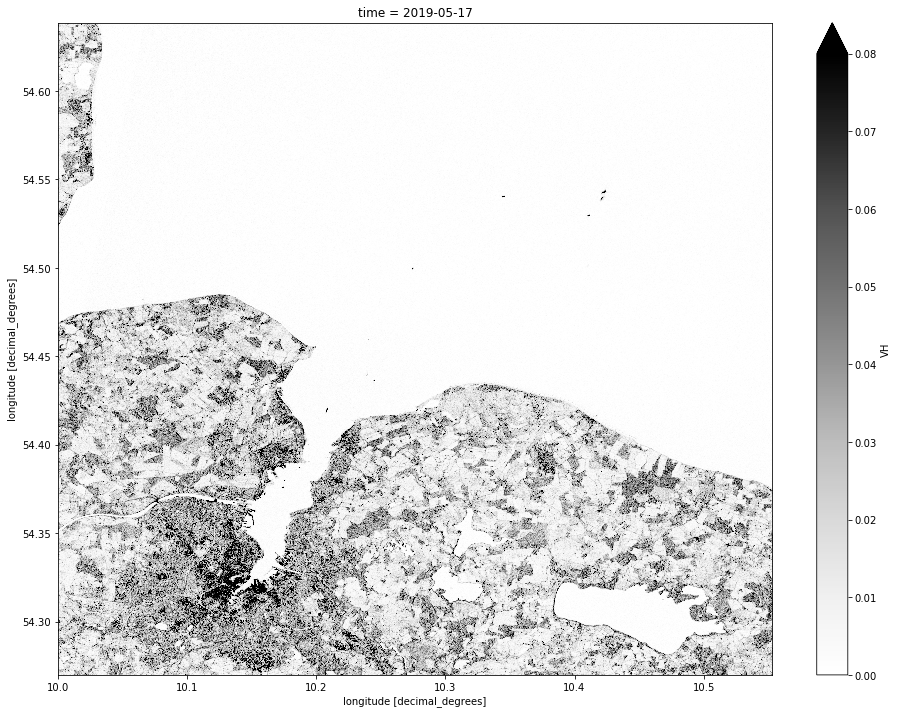

In [23]:
cube.VH.isel(time=1).plot.imshow(cmap='Greys',vmax =0.08, figsize = [16,12])

In [24]:
SH.dataset_names

['CUSTOM', 'S2L1C', 'S1GRD', 'S2L2A', 'DEM']

## Digital Elevation Model

In [69]:
SH.band_names('DEM')

['DEM']

In [30]:
x1 = 10.00  # degree
y1 = 54.27  # degree
x2 = 10.50  # degree
y2 = 54.40  # degree

bbox = x1, y1, x2, y2

In [31]:
spatial_res = 0.0002

In [34]:
cube_config = CubeConfig(dataset_name='DEM',
                         band_names=['DEM'],
                         tile_size=[512, 512],
                         crs = "http://www.opengis.net/def/crs/EPSG/0/4326",
                         spatial_res = spatial_res,
                         geometry=bbox,
                         time_range=['2019-05-14', '2019-07-31'],
                         time_period='100D')  

In [35]:
cube = open_cube(cube_config)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 650, lon: 2560, time: 1)
Coordinates:
  * lat        (lat) float64 54.4 54.4 54.4 54.4 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 10.51 10.51 10.51 10.51
  * time       (time) datetime64[ns] 2019-07-03
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    DEM        (time, lat, lon) float32 dask.array<chunksize=(1, 650, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     DEM Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2019-11-12T14:55:45.800761
    processing_level:          None
    time_coverage_start:       2019-05-14T00:00:00+00:00
    time_coverage_end:         2019-08-22T00:00:00+00:00
    time_coverage_duration:    P100DT0H0M0S
    time_coverage_resolution:  P100DT0H0M0S

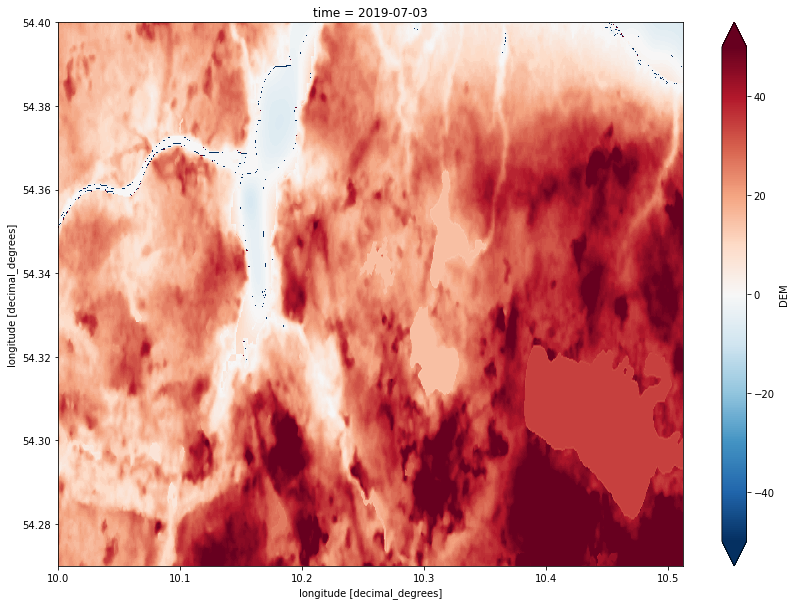

In [36]:
cube.DEM.isel(time=0).plot.imshow(vmin = -50, figsize = [14,10])

## Bring your own data

#### Define bounding box in Mercator coordinates

In [71]:
x1 = 1545577  # meters
y1 = 5761986  # meters
x2 = 1705367  # meters
y2 = 5857046  # meters

bbox = x1, y1, x2, y2

In [72]:
width = 512
spatial_res = (x2 - x1) / width
height = max(1, round((y2 - y1) / spatial_res))

#### Custom data set contains bands RED, GREEN, and BLUE. 

In [73]:
cube_config = CubeConfig(dataset_name='CUSTOM',
                         band_names=['RED', 'GREEN', 'BLUE'],                        
                         tile_size=[width, height],
                         crs='http://www.opengis.net/def/crs/EPSG/0/3857',
                         geometry=bbox,
                         time_range=['2018-01-01', '2019-01-01'],
                         time_period='7d',
                         spatial_res=spatial_res,
                         band_sample_types='UINT8',
                         collection_id='1a3ab057-3c51-447c-9f85-27d4b633b3f5')

In [75]:
cube = open_cube(cube_config)
cube 

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 53, x: 512, y: 305)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-04T12:00:00 ... 2019-01-03T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(53, 2), meta=np.ndarray>
  * x          (x) float64 1.546e+06 1.546e+06 1.546e+06 ... 1.705e+06 1.705e+06
  * y          (y) float64 5.857e+06 5.857e+06 5.856e+06 ... 5.762e+06 5.762e+06
Dimensions without coordinates: bnds
Data variables:
    BLUE       (time, y, x) uint8 dask.array<chunksize=(1, 305, 512), meta=np.ndarray>
    GREEN      (time, y, x) uint8 dask.array<chunksize=(1, 305, 512), meta=np.ndarray>
    RED        (time, y, x) uint8 dask.array<chunksize=(1, 305, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     CUSTOM Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2019-11-12T15:11:27.056220
    processing_level:       

In [76]:
cubew = cube.isel(time=26)

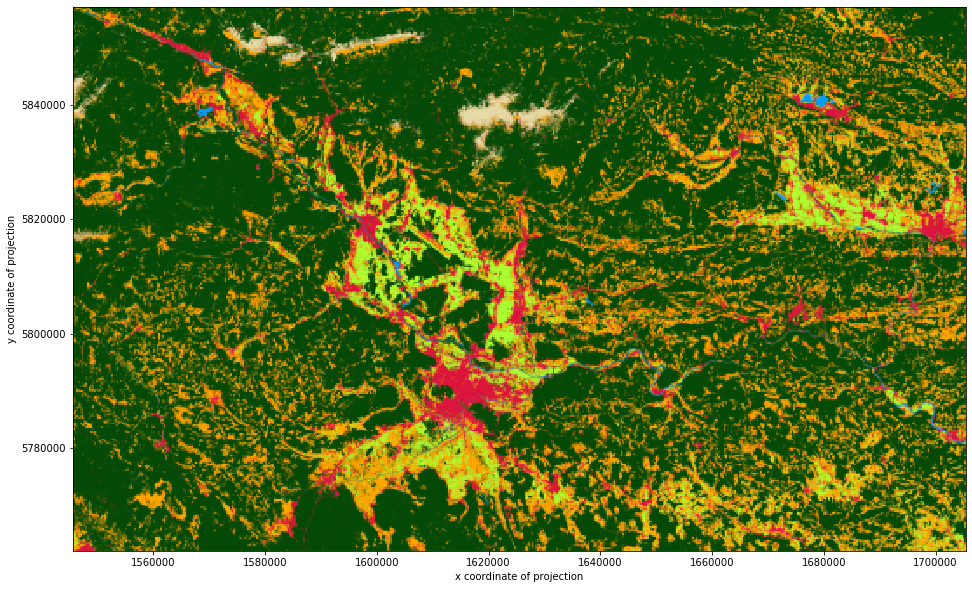

In [77]:
rgb_data = np.zeros((305, 512, 3), 'uint8')
rgb_data[:, :, 0] = cubew.RED.values
rgb_data[:, :, 1] = cubew.GREEN.values
rgb_data[:, :, 2] = cubew.BLUE.values

rgb_array = xr.DataArray(rgb_data, dims=('y', 'x', 'b'), coords=dict(x=cube.RED.x, y=cube.RED.y))
rgb_array.plot.imshow(rgb='b', figsize=(16, 10))

In [79]:
rgb_array

<xarray.DataArray (y: 305, x: 512, b: 3)>
array([[[ 48,  95,  18],
        [ 50, 109,  77],
        [234, 160,   9],
        ...,
        [  8,  74,   7],
        [  5,  73,   7],
        [  5,  73,   7]],

       [[ 80,  98,   8],
        [ 37,  89,  23],
        [ 51,  98,  44],
        ...,
        [ 53,  91,   6],
        [  5,  73,   7],
        [  5,  73,   7]],

       [[ 20,  77,   7],
        [  5,  73,   7],
        [  5,  73,   7],
        ...,
        [ 40,  86,   5],
        [  5,  73,   7],
        [  5,  73,   7]],

       ...,

       [[238, 181,   9],
        [248, 171,   0],
        [241, 165,  12],
        ...,
        [193, 195,  43],
        [251, 157,   3],
        [254, 165,   0]],

       [[254, 165,   0],
        [251, 168,   0],
        [229, 185,  16],
        ...,
        [222, 174,  25],
        [245, 174,   5],
        [224, 197,  18]],

       [[249, 154,   6],
        [238, 106,  25],
        [227,  63,  44],
        ...,
        [194, 216,  33],
       